# Image and data management API for utils.py

The `utils.py` file contains utilities for image and data management geared towards this project.  




In [5]:
import numpy as np
import matplotlib.pyplot as plt 

from utils import Image 

## here's an image. 

Its automatically compressed to a square of `resize` dimension.  
Original image stored in `.original`.


A few things happen when an Image object is created. 
+ Padding is added
+ BGR channels are created (self.blue_channel, etc) 
+ gray conversion is done (self.gray) 

Text(0.5, 1.0, 'post-processed')

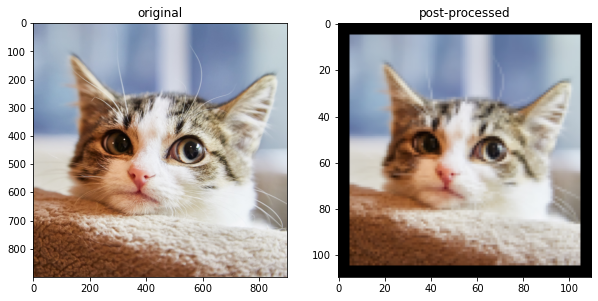

In [9]:
img = Image('data/cat/cat01.jpg', resize=100, padding=5)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))

#Converts from BGR to RGB
axes[0].imshow(cv2.cvtColor(img.original, cv2.COLOR_BGR2RGB))
axes[0].set_title('original')
axes[1].imshow(cv2.cvtColor(img.data, cv2.COLOR_BGR2RGB))
axes[1].set_title('post-processed')

Text(0.5, 1.0, 'post-processed')

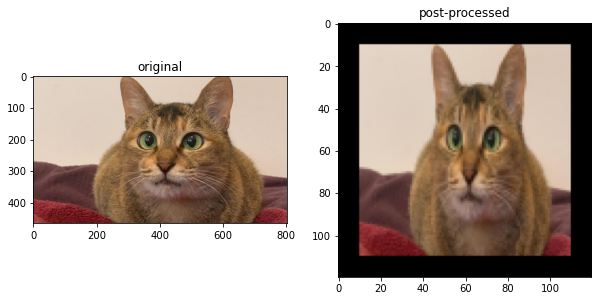

In [12]:
# A not-natively square image 
img2 = Image('data/cat/cat02.jpg', resize=100)
#Converts from BGR to RGB

fig, axes = plt.subplots(1, 2, figsize=(10, 10))

axes[0].imshow(cv2.cvtColor(img2.original, cv2.COLOR_BGR2RGB))
axes[0].set_title('original')
axes[1].imshow(cv2.cvtColor(img2.data, cv2.COLOR_BGR2RGB))
axes[1].set_title('post-processed')

# Looks derp...but, good enough.  

## Get RBG channels 
We will need the individual channel values for calculating the loss  

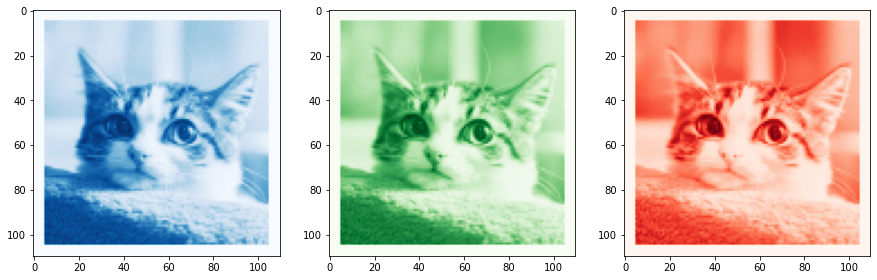

In [13]:
b, g, r = img.get_BGR_channels()

fig, axes = plt.subplots(1, 3, figsize=(15, 15))

axes[0].imshow(-b, cmap=plt.get_cmap('Blues'))
axes[1].imshow(-g, cmap=plt.get_cmap('Greens'))
axes[2].imshow(-r, cmap=plt.get_cmap('Reds'))    

# Gray conversion (according to equation in assignment descr)

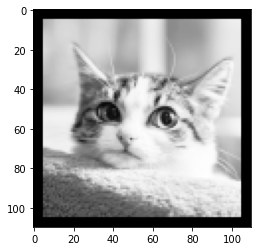

In [14]:
g = img.convert_gray()

plt.imshow(-g, cmap=plt.get_cmap('Greys'))

# Padding

`img.padding(10)` should apply a 10 pixel padding to img.data.  


Padding is automatically added when images are created 

# Generating dataset

Returns gray, blue, green, and red pixel values for a 2*zeta by 2*zeta square around a target cell.  The returned arrays are one dimensional 

In [23]:
win_size = 19
gr, bl, gn, re = img.get_dataset_for_pixel(76, 45, window_size=win_size)

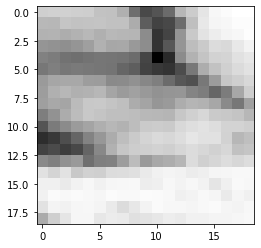

In [24]:
plt.imshow(-gr.reshape(win_size, -1), cmap=plt.get_cmap('Greys'))

In [26]:
print("Shape of X vector: ", gr.shape)
print("Values of B G and R vectors (y): ", bl, gn, re)

Shape of X vector:  (361,)
Values of B G and R vectors (y):  125 155 201


# Reconstruct colored image from RBG vectors 

In [28]:
from utils import reconstruct_from_vectors 

(12100,)


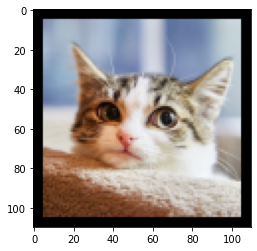

In [30]:
blue_test = img.blue_channel.reshape(-1, 1).squeeze()
green_test = img.green_channel.reshape(-1, 1).squeeze()
red_test = img.red_channel.reshape(-1, 1).squeeze()

print(blue_test.shape)

reconstructed = reconstruct_from_vectors(blue_test, green_test, red_test, 110)
plt.imshow(cv2.cvtColor(reconstructed.astype('uint8'), cv2.COLOR_BGR2RGB))


### meow 